In [1]:
import pandas as pd
import networkx as nx

In [36]:
student_data = pd.read_csv("synthetic_student_data.csv")

In [37]:
student_data.head()

,StudentID,Academic_Performance,isolated,WomenDifferent,language,COVID,criticises,MenBetterSTEM,pwi_wellbeing,Intelligence1,...,k6_4,k6_5,k6_6,Manbox5_overall,Masculinity_contrained,GrowthMindset,k6_overall,School_support_engage,Friends,Friends_Count
0,S0001,74,1,3,0,3,6,3,0,3,...,4,4,4,3.4,3.50,5.0,23,2.75,"S0189, S0389, S0978, S0363, S0087, S0560, S0742",7
1,S0002,72,3,7,0,7,5,1,4,2,...,5,3,1,3.0,3.50,4.0,20,4.00,"S0311, S0653, S0346, S0548",4
2,S0003,91,1,5,0,1,4,4,8,3,...,1,5,5,3.4,4.00,4.5,20,3.75,"S0595, S0904, S0320, S0697, S0268, S0676",6
3,S0004,57,5,3,0,3,7,5,10,4,...,5,3,5,4.2,3.75,2.5,22,4.50,"S0345, S0080, S0555, S0306, S0487, S0168",6
4,S0005,67,5,6,0,5,2,3,1,5,...,5,3,1,2.8,3.75,4.5,16,4.00,"S0396, S0976, S0289",3


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   StudentID               1000 non-null   object 
 1   Academic_Performance    1000 non-null   int64  
 2   isolated                1000 non-null   int64  
 3   WomenDifferent          1000 non-null   int64  
 4   language                1000 non-null   int64  
 5   COVID                   1000 non-null   int64  
 6   criticises              1000 non-null   int64  
 7   MenBetterSTEM           1000 non-null   int64  
 8   pwi_wellbeing           1000 non-null   int64  
 9   Intelligence1           1000 non-null   int64  
 10  Intelligence2           1000 non-null   int64  
 11  Soft                    1000 non-null   int64  
 12  opinion                 1000 non-null   int64  
 13  Nerds                   1000 non-null   int64  
 14  comfortable             1000 non-null   i

In [38]:
# Step 1: Check for missing values
student_data.isnull().sum()

StudentID                   0
Academic_Performance        0
isolated                    0
WomenDifferent              0
language                    0
COVID                       0
criticises                  0
MenBetterSTEM               0
pwi_wellbeing               0
Intelligence1               0
Intelligence2               0
Soft                        0
opinion                     0
Nerds                       0
comfortable                 0
future                      0
bullying                    0
Manbox5_1                   0
Manbox5_2                   0
Manbox5_3                   0
Manbox5_4                   0
Manbox5_5                   0
k6_1                        0
k6_2                        0
k6_3                        0
k6_4                        0
k6_5                        0
k6_6                        0
Manbox5_overall             0
Masculinity_contrained      0
GrowthMindset               0
k6_overall                  0
School_support_engage       0
Friends   

In [39]:
# Step 2: Clean the 'Friends' column safely
student_data['Friends'] = student_data['Friends'].fillna('')  # Fill NaN with empty string

# Convert to list only if it's a string
student_data['Friends'] = student_data['Friends'].apply(
    lambda x: [] if x == '' else (x if isinstance(x, list) else x.split(','))
)

In [40]:
# Step 3: Check for dulicate values
student_data_no_friends = student_data.drop(columns=['Friends'])
duplicate_rows = student_data[student_data_no_friends.duplicated()]
print(f"Duplicate rows found (excluding 'Friends'): {len(duplicate_rows)}")

duplicate_ids = student_data[student_data.duplicated(subset='StudentID')]
print(f"Duplicate StudentIDs found: {len(duplicate_ids)}")

Duplicate rows found (excluding 'Friends'): 0
Duplicate StudentIDs found: 0


In [41]:
# Step 4: Check basic statistical summary to find outliers or weird values
student_data.describe()

,Academic_Performance,isolated,WomenDifferent,language,COVID,criticises,MenBetterSTEM,pwi_wellbeing,Intelligence1,Intelligence2,...,k6_3,k6_4,k6_5,k6_6,Manbox5_overall,Masculinity_contrained,GrowthMindset,k6_overall,School_support_engage,Friends_Count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,69.285000,4.056000,4.015000,0.214000,4.104000,4.006000,4.040000,4.878000,3.937000,3.893000,...,2.964000,2.908000,3.03000,2.970000,3.967600,3.978250,4.085000,17.945000,3.942750,3.474000
std,14.492336,1.977062,2.017634,0.410332,2.034041,1.996484,2.046604,3.164353,2.015215,2.008877,...,1.426443,1.416171,1.40822,1.413187,0.892315,1.011181,1.449612,3.419601,0.992166,2.324807
min,20.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.600000,1.250000,1.000000,8.000000,1.000000,0.000000
25%,60.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.00000,2.000000,3.400000,3.250000,3.000000,16.000000,3.250000,1.000000
50%,69.000000,4.000000,4.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.00000,3.000000,4.000000,4.000000,4.000000,18.000000,4.000000,3.000000
75%,79.000000,6.000000,6.000000,0.000000,6.000000,6.000000,6.000000,8.000000,6.000000,6.000000,...,4.000000,4.000000,4.00000,4.000000,4.600000,4.750000,5.000000,20.000000,4.500000,6.000000
max,100.000000,7.000000,7.000000,1.000000,7.000000,7.000000,7.000000,10.000000,7.000000,7.000000,...,5.000000,5.000000,5.00000,5.000000,6.400000,6.750000,7.000000,27.000000,7.000000,7.000000


In [42]:
# Step 5: Create the required fields
processed_data = student_data.copy()

# Create the fields
processed_data['Wellbeing_Score'] = processed_data['pwi_wellbeing']
processed_data['Friendliness_Score'] = processed_data['School_support_engage']
processed_data['Bullying_Score'] = processed_data['criticises']
processed_data['Composite_Score'] = (
    0.5 * processed_data['Academic_Performance'] +
    0.3 * processed_data['Wellbeing_Score'] +
    0.2 * processed_data['Friendliness_Score']
)
processed_data['Is_Bully'] = processed_data['Bullying_Score'] >= 5

# Show the first few rows to confirm
processed_data[['StudentID', 'Academic_Performance', 'Wellbeing_Score', 
                'Friendliness_Score', 'Bullying_Score', 'Composite_Score', 'Is_Bully']].head()

,StudentID,Academic_Performance,Wellbeing_Score,Friendliness_Score,Bullying_Score,Composite_Score,Is_Bully
0,S0001,74,0,2.75,6,37.55,True
1,S0002,72,4,4.00,5,38.00,True
2,S0003,91,8,3.75,4,48.65,False
3,S0004,57,10,4.50,7,32.40,True
4,S0005,67,1,4.00,2,34.60,False


In [43]:
# Step 6: Create Social Network Graph
# Load the dataset
student_data = pd.read_csv("synthetic_student_data.csv")

# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(student_data["StudentID"])

# Add edges from the 'Friends' column
for _, row in student_data.iterrows():
    student = row["StudentID"]
    if pd.notna(row["Friends"]):
        friends = [f.strip() for f in row["Friends"].split(",")]
        for friend in friends:
            G.add_edge(student, friend)

# Print basic stats
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is the graph connected?", nx.is_connected(G))

Number of nodes: 1000
Number of edges: 3469
Is the graph connected? False


In [44]:
components = list(nx.connected_components(G))
print(f"Number of connected components: {len(components)}")

Number of connected components: 5


In [45]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
student_data["degree_centrality"] = student_data["StudentID"].map(degree_centrality)

# Clustering Coefficient
clustering = nx.clustering(G)
student_data["clustering"] = student_data["StudentID"].map(clustering)

# Component Label (which cluster the student belongs to)
component_map = {}
for i, comp in enumerate(components):
    for node in comp:
        component_map[node] = i
student_data["component_id"] = student_data["StudentID"].map(component_map)

# Preview the updated table
student_data[["StudentID", "degree_centrality", "clustering", "component_id"]].head(10)

,StudentID,degree_centrality,clustering,component_id
0,S0001,0.009009,0.027778,0
1,S0002,0.007007,0.000000,0
2,S0003,0.015015,0.009524,0
3,S0004,0.010010,0.044444,0
4,S0005,0.005005,0.000000,0
5,S0006,0.003003,0.000000,0
6,S0007,0.007007,0.000000,0
7,S0008,0.003003,0.000000,0
8,S0009,0.002002,0.000000,0
9,S0010,0.006006,0.000000,0


In [46]:
import numpy as np
import random
import pandas as pd

class StudentAssignmentEnv:
    def __init__(self, students_df, n_classes=4):
        self.students = students_df.copy()
        self.classrooms = {f"Class_{i}": [] for i in range(n_classes)}
        self.n_classes = n_classes
        self.reset()

    def reset(self):
        self.classrooms = {f"Class_{i}": [] for i in range(self.n_classes)}
        # Sort students by Composite Score descending
        self.unassigned_students = self.students.sort_values(by='Composite_Score', ascending=False).index.tolist()
        return self._get_state()

    def _get_state(self):
        state = {
            'classroom_sizes': [len(cls) for cls in self.classrooms.values()],
            'unassigned': self.unassigned_students.copy()
        }
        return state

    def step(self, action_classroom):
        if not self.unassigned_students:
            return self._get_state(), 0, True

        student_idx = self.unassigned_students.pop(0)
        student = self.students.loc[student_idx]
        self.classrooms[action_classroom].append(student_idx)

        done = len(self.unassigned_students) == 0

        if done:
            reward, academic_std, wellbeing_std, bullying_penalty = self._calculate_reward()
        else:
            reward, academic_std, wellbeing_std, bullying_penalty = 0, 0, 0, 0

        return self._get_state(), reward, done, academic_std, wellbeing_std, bullying_penalty

    def _calculate_reward(self):
        academic_scores = []
        wellbeing_scores = []
        bullying_risks = []
        total_students = sum(len(cls) for cls in self.classrooms.values())

        for cls_indices in self.classrooms.values():
            if not cls_indices:
                continue
            cls_students = self.students.loc[cls_indices]
            sampled_students = cls_students.sample(n=min(20, len(cls_students)))
            academic_scores.append(sampled_students['Academic_Performance'].mean())
            wellbeing_scores.append(sampled_students['Wellbeing_Score'].mean())
            bullying_risks.append(sampled_students['Is_Bully'].sum())

        academic_std = np.std(academic_scores)
        wellbeing_std = np.std(wellbeing_scores)
        bullying_penalty = sum(bullying_risks) / max(total_students, 1)

        # Clamp values to prevent explosion
        academic_std = min(academic_std, 10)
        wellbeing_std = min(wellbeing_std, 5)

        reward = -((academic_std / 100) + (wellbeing_std / 10) + bullying_penalty)
        return reward, academic_std, wellbeing_std, bullying_penalty

In [47]:
# ✅ Load the full real dataset instead of generating dummy data
raw_df = pd.read_csv("synthetic_student_data.csv")

# Clean + create all required columns
students_df = raw_df.copy()
students_df['Wellbeing_Score'] = students_df['pwi_wellbeing']
students_df['Friendliness_Score'] = students_df['School_support_engage']
students_df['Bullying_Score'] = students_df['criticises']
students_df['Composite_Score'] = (
    0.5 * students_df['Academic_Performance'] +
    0.3 * students_df['Wellbeing_Score'] +
    0.2 * students_df['Friendliness_Score']
)
students_df['Is_Bully'] = students_df['Bullying_Score'] >= 5

# ✅ Compute Composite Score (same logic as your synthetic one)
students_df['Composite_Score'] = (
    0.5 * students_df['Academic_Performance'] +
    0.3 * students_df['Wellbeing_Score'] -
    0.2 * students_df['Is_Bully']
)

# Instantiate the environment with full dataset
env = StudentAssignmentEnv(students_df, n_classes=4)

# Reset environment
state = env.reset()
done = False

# Random assignment of students to classrooms
while not done:
    random_class = f"Class_{random.randint(0, env.n_classes - 1)}"
    state, reward, done, academic_std, wellbeing_std, bullying_penalty = env.step(random_class)

# Print the final results
print("Test Environment Completed")
print(f"Final Reward: {reward:.4f}")
print(f"Academic Std Deviation: {academic_std:.2f}")
print(f"Wellbeing Std Deviation: {wellbeing_std:.2f}")
print(f"Bullying Penalty: {bullying_penalty:.4f}")


Test Environment Completed
Final Reward: -0.0874
Academic Std Deviation: 1.10
Wellbeing Std Deviation: 0.36
Bullying Penalty: 0.0400


In [16]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


Episode 10:
  Total Normalized Reward: 999.43
  Academic Std Deviation: 4.42
  Wellbeing Std Deviation: 0.47
  Bullying Penalty: 0.0250
----------------------------------------
Episode 20:
  Total Normalized Reward: 999.59
  Academic Std Deviation: 1.77
  Wellbeing Std Deviation: 0.62
  Bullying Penalty: 0.0270
----------------------------------------
Episode 30:
  Total Normalized Reward: 999.64
  Academic Std Deviation: 0.35
  Wellbeing Std Deviation: 0.51
  Bullying Penalty: 0.0330
----------------------------------------
Episode 40:
  Total Normalized Reward: 999.47
  Academic Std Deviation: 2.08
  Wellbeing Std Deviation: 0.78
  Bullying Penalty: 0.0370
----------------------------------------
Episode 50:
  Total Normalized Reward: 999.48
  Academic Std Deviation: 2.99
  Wellbeing Std Deviation: 0.99
  Bullying Penalty: 0.0290
----------------------------------------
Episode 60:
  Total Normalized Reward: 999.35
  Academic Std Deviation: 5.73
  Wellbeing Std Deviation: 0.64
  Bull

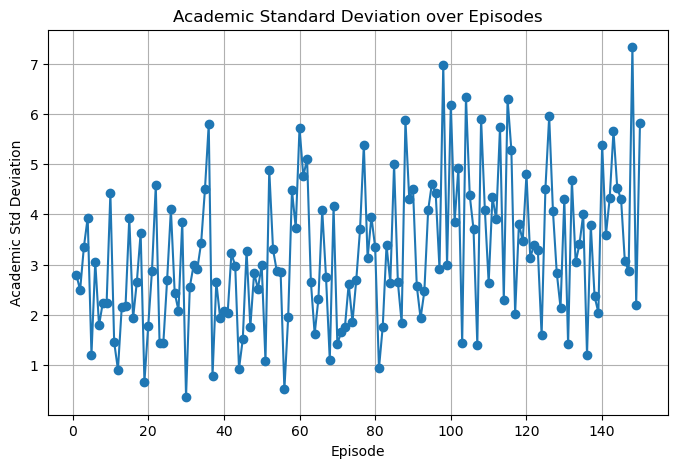

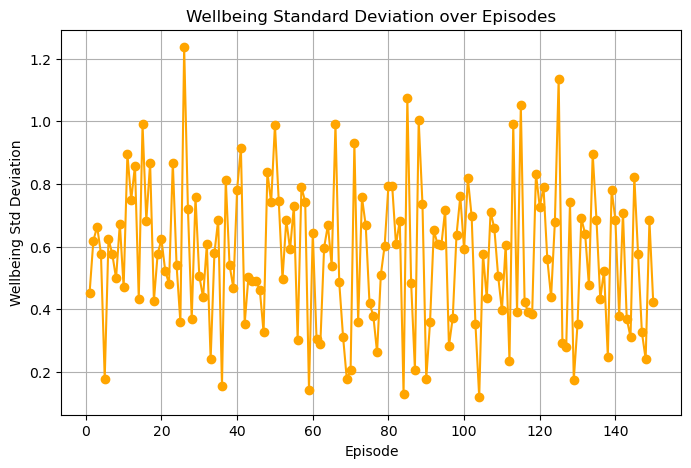

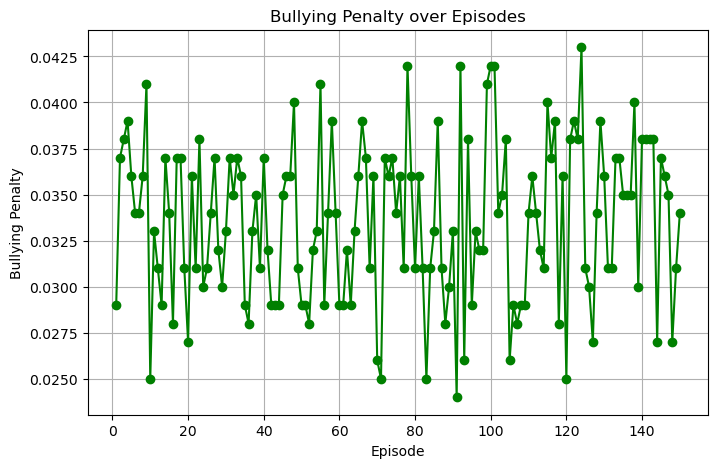

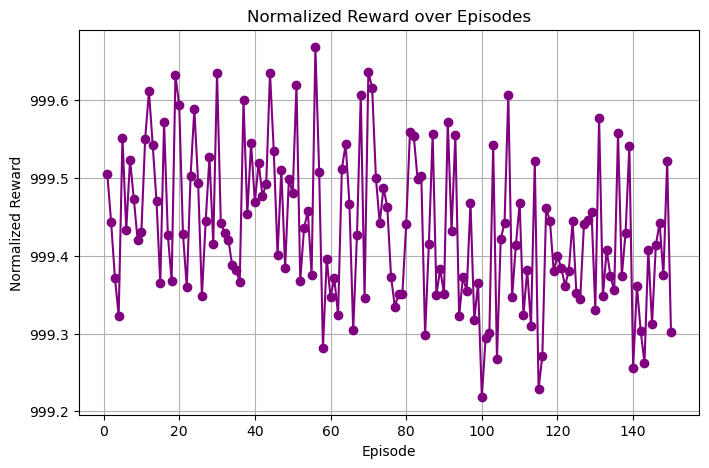


🎯 Best Episode: 56 | Reward: 999.67
✅ Extracted 1000 student-class assignments


In [48]:
# ----------------------------------
# 1. Import Libraries
# ----------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------
# 2. Define DQN Model
# ----------------------------------
class DQNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# ----------------------------------
# 3. Define DQN Agent
# ----------------------------------
class DQNAgent:
    def __init__(self, input_dim, output_dim, lr=0.001, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.model = DQNModel(input_dim, output_dim)
        self.target_model = DQNModel(input_dim, output_dim)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.output_dim = output_dim

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.output_dim - 1)
        else:
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.model(state_tensor)
            return torch.argmax(q_values).item()

    def train_step(self, state, action, reward, next_state, done):
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0)
        reward_tensor = torch.FloatTensor([reward])
        action_tensor = torch.LongTensor([action])

        q_value = self.model(state_tensor).gather(1, action_tensor.unsqueeze(1)).squeeze(1)
        next_q_value = self.target_model(next_state_tensor).max(1)[0]
        expected_q_value = reward_tensor + (1 - int(done)) * self.gamma * next_q_value

        loss = self.criterion(q_value, expected_q_value.detach())

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target(self):
        self.target_model.load_state_dict(self.model.state_dict())

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# ----------------------------------
# 4. Train the DQN Agent
# ----------------------------------
n_episodes = 150  # Longer training

agent = DQNAgent(input_dim=4, output_dim=4, epsilon_min=0.01)  # 🔥 Lower epsilon_min

academic_stds = []
wellbeing_stds = []
bullying_penalties = []
normalized_rewards = []

for episode in range(n_episodes):
    state_data = env.reset()
    total_custom_reward = 0
    done = False
    steps = 0

    academic_std_episode = 0
    wellbeing_std_episode = 0
    bullying_penalty_episode = 0

    while not done:
        classroom_sizes = np.array(state_data['classroom_sizes']) / 10000  # Normalize
        action = agent.choose_action(classroom_sizes)

        next_state_data, _, done, academic_std, wellbeing_std, bullying_penalty = env.step(f"Class_{action}")
        next_classroom_sizes = np.array(next_state_data['classroom_sizes']) / 10000

        # Updated stronger reward calculation
        custom_reward = (
            0.7 * (1 - min(academic_std, 5) / 10) +   # Stronger academic penalty + cap academic std
            0.2 * (1 - wellbeing_std / 10) +
            0.1 * (1 - bullying_penalty * 100)
        )

        agent.train_step(classroom_sizes, action, custom_reward, next_classroom_sizes, done)

        total_custom_reward += custom_reward
        state_data = next_state_data
        steps += 1

        academic_std_episode = academic_std
        wellbeing_std_episode = wellbeing_std
        bullying_penalty_episode = bullying_penalty

    normalized_reward = (total_custom_reward / steps) * 1000  # Smooth reward scale
    normalized_rewards.append(normalized_reward)
    academic_stds.append(academic_std_episode)
    wellbeing_stds.append(wellbeing_std_episode)
    bullying_penalties.append(bullying_penalty_episode)

    agent.decay_epsilon()

    if (episode + 1) % 10 == 0:
        agent.update_target()
        print(f"Episode {episode + 1}:")
        print(f"  Total Normalized Reward: {normalized_reward:.2f}")
        print(f"  Academic Std Deviation: {academic_std_episode:.2f}")
        print(f"  Wellbeing Std Deviation: {wellbeing_std_episode:.2f}")
        print(f"  Bullying Penalty: {bullying_penalty_episode:.4f}")
        print("-" * 40)

# ----------------------------------
# 5. Plotting Results
# ----------------------------------

episodes = np.arange(1, n_episodes + 1)

plt.figure(figsize=(8, 5))
plt.plot(episodes, academic_stds, marker='o')
plt.title('Academic Standard Deviation over Episodes')
plt.xlabel('Episode')
plt.ylabel('Academic Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, wellbeing_stds, marker='o', color='orange')
plt.title('Wellbeing Standard Deviation over Episodes')
plt.xlabel('Episode')
plt.ylabel('Wellbeing Std Deviation')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, bullying_penalties, marker='o', color='green')
plt.title('Bullying Penalty over Episodes')
plt.xlabel('Episode')
plt.ylabel('Bullying Penalty')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(episodes, normalized_rewards, marker='o', color='purple')
plt.title('Normalized Reward over Episodes')
plt.xlabel('Episode')
plt.ylabel('Normalized Reward')
plt.grid(True)
plt.show()


# 🧠 Find best episode and replay it to get assignments
best_episode_index = np.argmax(normalized_rewards)
print(f"\n🎯 Best Episode: {best_episode_index + 1} | Reward: {normalized_rewards[best_episode_index]:.2f}")

# ✅ Correctly replay environment and assign all students
state_data = env.reset()
assignments = []

max_students = len(env.students)  # ✅ This ensures we assign all students used in training

for student_id in range(max_students):
    classroom_sizes = np.array(state_data['classroom_sizes']) / 10000
    action = agent.choose_action(classroom_sizes)
    assignments.append(action)

    next_state_data, _, _, _, _, _ = env.step(f"Class_{action}")
    state_data = next_state_data

print(f"✅ Extracted {len(assignments)} student-class assignments")



In [50]:
print(f"From RL: extracted {len(assignments)} assignments")


From RL: extracted 1000 assignments


# HYBRID model - RL + CP

In [51]:
# Step 1: Preprocessing for CP-SAT Classroom Allocation

import pandas as pd

# Load your synthetic student dataset
df = pd.read_csv("synthetic_student_data.csv")

# Add derived features if needed
df['Isolation_Score'] = 7 - df['isolated']
df['COVID_Score'] = 7 - df['COVID']
df['Wellbeing_Score'] = (df['pwi_wellbeing'] + df['Isolation_Score'] + df['COVID_Score']) / 3
df['Bullying_Score'] = df['criticises']
df['Friendliness_Score'] = df['School_support_engage']
df['Student_Index'] = range(len(df))

# Use only required fields
student_data = df[['Student_Index', 'Academic_Performance', 'Wellbeing_Score', 
                   'Bullying_Score', 'Friendliness_Score', 'language']]

num_students = len(student_data)
assert len(assignments) == num_students, "❌ Mismatch: RL assigned fewer students than CP expects"


print("✅ Loaded", num_students, "students")


✅ Loaded 1000 students


In [25]:
!pip install ortools

In [52]:
from ortools.sat.python import cp_model
from collections import defaultdict
import math

model = cp_model.CpModel()

# Class parameters
class_size_limit = 25
num_classes = math.ceil(num_students / class_size_limit)

print("🔧 Using", num_classes, "classes of size", class_size_limit)

# ✅ Use RL assignments from in-memory list called `assignments`
student_vars = []
for i in range(num_students):
    assigned_class = assignments[i]  # from RL
    var = model.NewIntVar(assigned_class, assigned_class, f'student_{i}_class')  # Fixed class
    student_vars.append(var)


# Boolean indicators: student in class
class_students = defaultdict(list)
for idx, var in enumerate(student_vars):
    for cls in range(num_classes):
        is_in_class = model.NewBoolVar(f'student_{idx}_is_in_class_{cls}')
        model.Add(var == cls).OnlyEnforceIf(is_in_class)
        model.Add(var != cls).OnlyEnforceIf(is_in_class.Not())
        class_students[cls].append(is_in_class)


🔧 Using 40 classes of size 25


In [31]:
print(f"From CP: expecting {num_students} students")


From CP: expecting 1000 students


In [55]:
# Constraint A: Each student assigned to exactly one class
for i in range(num_students):
    model.Add(sum(class_students[cls][i] for cls in range(num_classes)) == 1)

# Constraint B: Each class has exactly 25 students

for cls in range(num_classes):
    model.Add(sum(class_students[cls]) == class_size_limit)

print("📏 Constraints added: student assignment + fixed class sizes")


📏 Constraints added: student assignment + fixed class sizes


In [56]:
# Solve
solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print("✅ Solution found!")
else:
    print("❌ No feasible solution found.")

❌ No feasible solution found.
